In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
train_file = './train.csv'
df_train = pd.read_csv(train_file)
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [91]:
df_train.shape

(10506, 12)

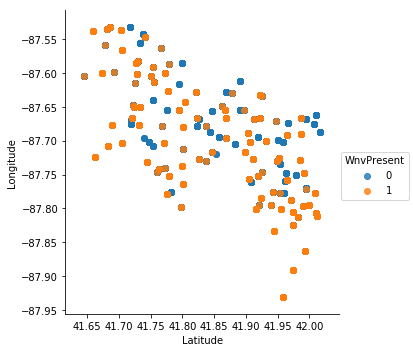

In [92]:
sns.lmplot(x='Latitude', y='Longitude', hue='WnvPresent', data=df_train, fit_reg=False)
plt.show()

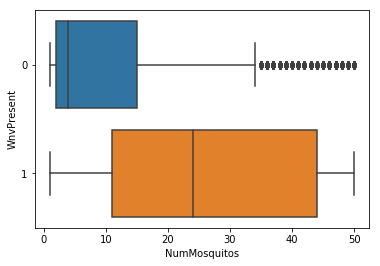

In [93]:
sns.boxplot(x='NumMosquitos', y='WnvPresent', data=df_train, orient='h')
plt.show()

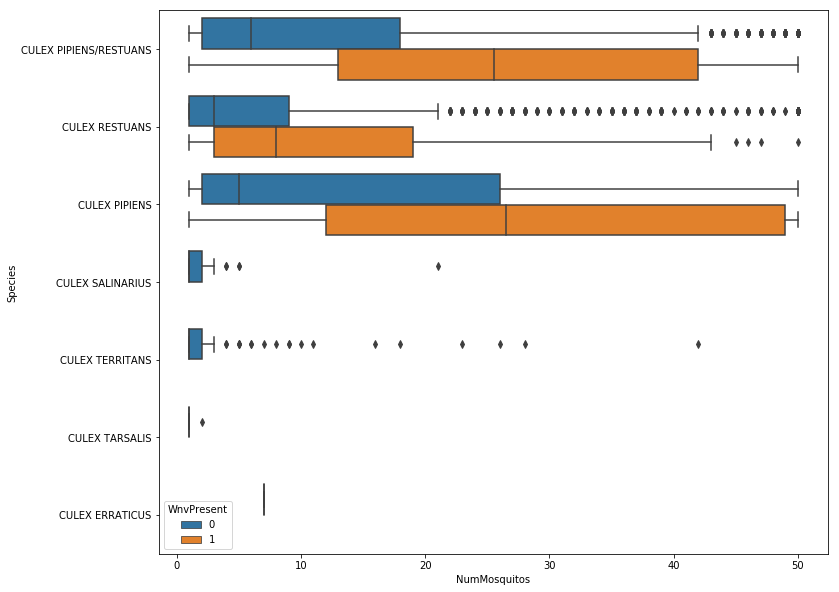

In [94]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='NumMosquitos', y='Species', hue='WnvPresent', data=df_train, orient='h')
plt.show()

In [95]:
convert_date = lambda dateTime: pd.to_datetime(dateTime, format='%Y-%m-%d', errors='raise', box=True)
df_train['Day'] = convert_date(df_train['Date']).apply(lambda v: v.day)
df_train['Month'] = convert_date(df_train['Date']).apply(lambda v: v.month)
df_train['Year'] = convert_date(df_train['Date']).apply(lambda v: v.year)
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


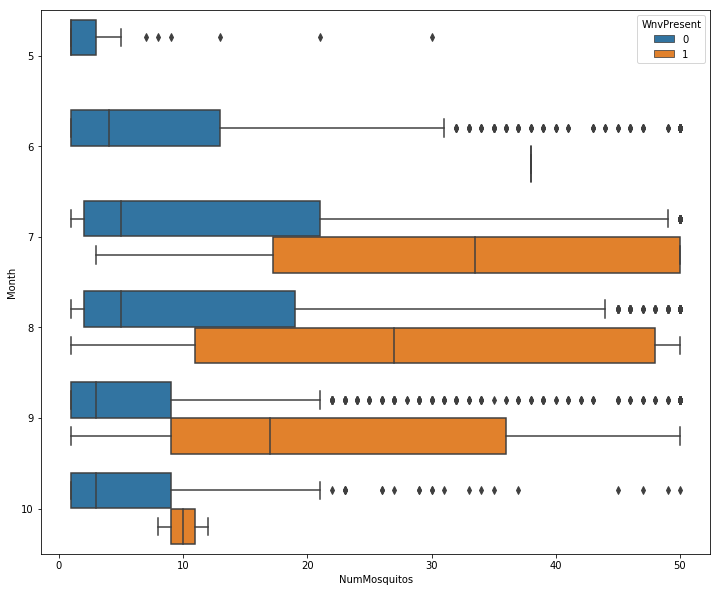

In [96]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='NumMosquitos', y='Month', hue='WnvPresent', data=df_train, orient='h')
plt.show()

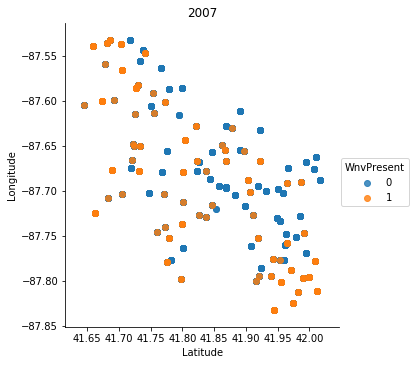

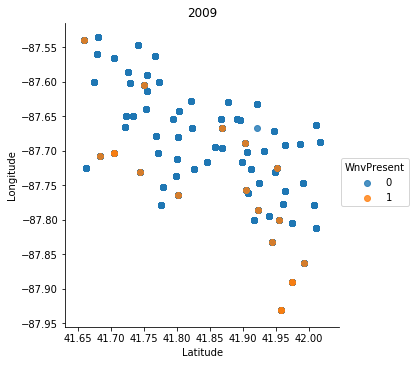

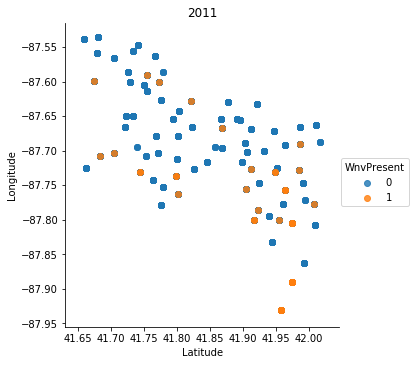

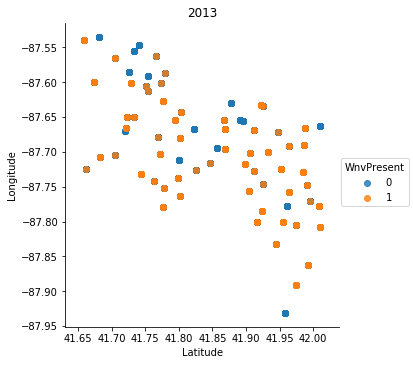

In [161]:
for year in range(2007, 2014):
    df_train_year = df_train[df_train['Year'] == year]
    if len(df_train_year) > 0:
        sns.lmplot(x='Latitude', y='Longitude', hue='WnvPresent', data=df_train_year, fit_reg=False)
        plt.title(year)
        plt.show()

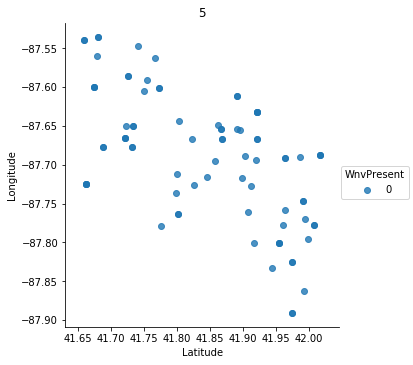

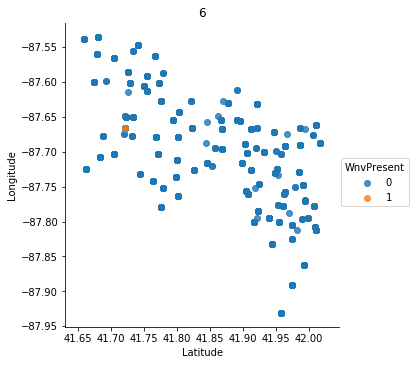

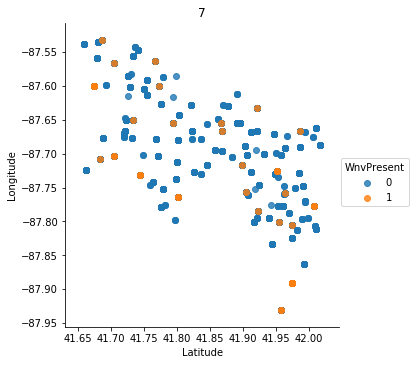

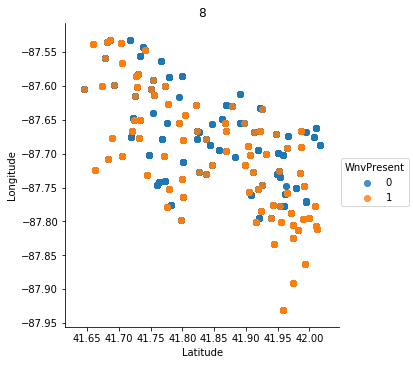

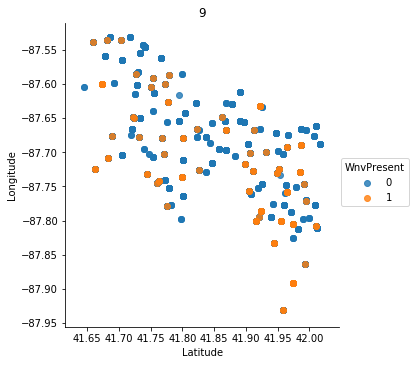

In [162]:
for Month in range(5, 10):
    df_train_year = df_train[df_train['Month'] == Month]
    if len(df_train_year) > 0:
        sns.lmplot(x='Latitude', y='Longitude', hue='WnvPresent', data=df_train_year, fit_reg=False)
        plt.title(Month)
        plt.show()

In [97]:
weather_file = './weather.csv'
df_weather = pd.read_csv(weather_file)
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [98]:
df_weather['Week'] = pd.to_datetime(df_weather['Date'], format='%Y-%m-%d', errors='raise', box=True).apply(lambda d: d.isocalendar()[1])
df_weather['Month'] = pd.to_datetime(df_weather['Date'], format='%Y-%m-%d', errors='raise', box=True).apply(lambda d: d.month)

df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Week,Month
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,M,0.0,0.00,29.10,29.82,1.7,27,9.2,18,5
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,M,M,0.00,29.18,29.82,2.7,25,9.6,18,5
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,M,0.0,0.00,29.38,30.09,13.0,4,13.4,18,5
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,M,M,0.00,29.44,30.08,13.3,2,13.4,18,5
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,M,0.0,0.00,29.39,30.12,11.7,7,11.9,18,5


In [99]:
df_weather[df_weather['Tavg'] == 'M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Week,Month
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,M,M,0.00,29.36,30.04,10.1,7,10.4,18,5
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,M,M,0.28,29.16,29.80,7.4,24,8.3,28,7
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,M,M,0.00,29.30,29.96,10.9,33,11.0,40,10
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,M,M,0.14,29.23,29.86,3.8,10,8.2,29,7
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,M,M,0.00,29.39,M,4.7,19,M,34,8
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,M,M,0.00,29.51,30.17,15.8,2,16.1,18,5
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,M,M,0.00,29.33,30.00,5.8,9,7.7,39,9
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,M,M,0.22,29.36,30.01,6.3,36,7.8,39,9
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,M,M,0.06,29.10,29.76,10.1,25,10.6,40,10
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,M,M,0.04,29.10,29.79,10.7,23,11.9,18,5


In [100]:
df_weather.loc[df_weather['Tavg'] == 'M', 'Tavg'] = (df_weather.loc[df_weather['Tavg'] == 'M', 'Tmax'] + df_weather.loc[df_weather['Tavg'] == 'M', 'Tmin'])/2

In [101]:
df_weather['Tavg'] = df_weather['Tavg'].map(int)

In [102]:
df_weather = df_weather[df_weather['WetBulb'] != 'M']

In [103]:
df_weather['WetBulb'] = df_weather['WetBulb'].apply(int)

In [104]:
df_weather['Humility'] = 100 - 350*np.abs(df_weather['Tavg'] - df_weather['WetBulb'])/df_weather['Tavg']

In [139]:
df_daily_weather = df_weather.loc[df_weather['Station'] == 1, ['Date', 'Tavg', 'Humility']].copy()
df_train_weather = df_train.merge(df_daily_weather, how='left', on='Date')

In [140]:
df_train_weather.shape

(10506, 17)

In [141]:
df_train.shape

(10506, 15)

In [142]:
assert len(df_train_weather) == len(df_train)

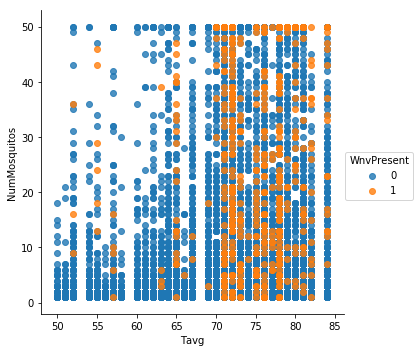

In [143]:
sns.lmplot(x='Tavg', y='NumMosquitos', hue='WnvPresent', data=df_train_weather, fit_reg=False)
plt.show()

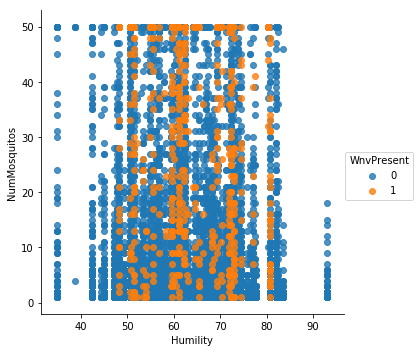

In [144]:
sns.lmplot(x='Humility', y='NumMosquitos', hue='WnvPresent', data=df_train_weather, fit_reg=False)
plt.show()

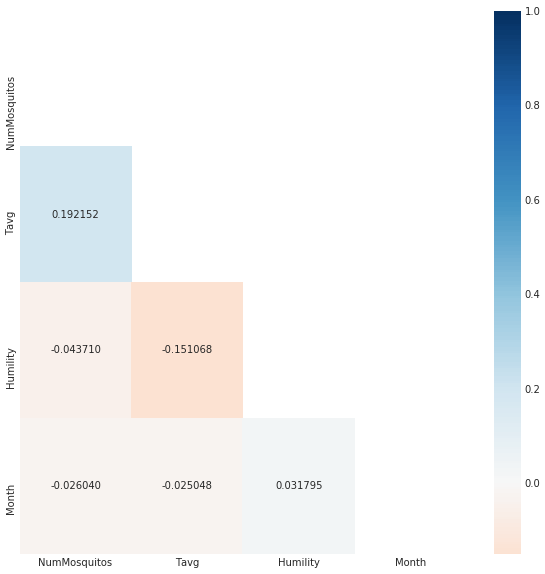

In [163]:
plt.figure(figsize=(10, 10))
corr = df_train_weather[['NumMosquitos', 'Tavg', 'Humility', 'Month']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, center=0, cmap='RdBu', annot=True, fmt='f')
plt.show()

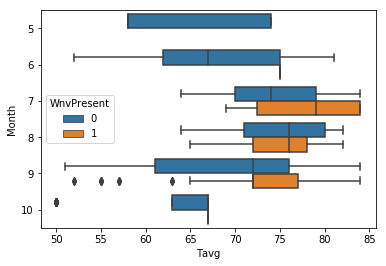

In [146]:
sns.boxplot(x='Tavg', y='Month', hue='WnvPresent', data=df_train_weather, orient='h')
plt.show()

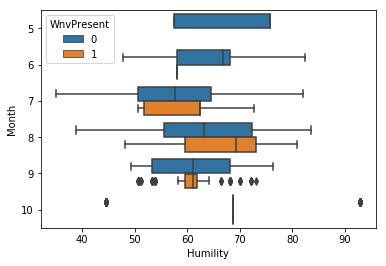

In [147]:
sns.boxplot(x='Humility', y='Month', hue='WnvPresent', data=df_train_weather, orient='h')
plt.show()

In [134]:
test_file = './test.csv'
df_test = pd.read_csv(test_file)
df_test.shape

(116293, 11)